In [1]:
# We get annoying warnings about backends that are safe to ignore
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors, colorbar
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

%matplotlib inline

from skimage import measure

from impdar.lib import load
from impdar.lib import plot
from impdar.lib import process
from autopicker_process import *
from autopicker_plot import *

In [2]:
#file on disk
green_mat = './data/nline5.mat'

#load in data
dat = load.load('mat', green_mat)[0]

dat.nmo_depth = dat.travel_time / 2.0 * 1.69e8 * 1.0e-6

#get positive contours around some amplitude
#we could do the same for negative contours with `neg = find_contours(dat, -3)`
pos = find_contours(dat, 3)

#generate filtered set of contours
long_contours_pos = filter_contours(pos, 500)

#let's process all of the contours here
argx_list, uniquex_list, ridge_points_list, top_list, bottom_list = process_contours(dat, long_contours_pos)

#colormap scaling values obtained from ImpDAR's plot function
min_ = -15
max_ = 15

#pick some contour at random, will be used to access contour/point lists
z = 159

#create new axis ticks and labels for zoomed in plot
ytick_list_contours = [4560, 4580, 4600, 4620, 4640, 4660, 4680]
ytick_labels_contours = [np.round(dat.nmo_depth[i], 2) for i in ytick_list_contours]

xlims = [2350, 2600]
ylims = [4680, 4550]

<IPython.core.display.Javascript object>


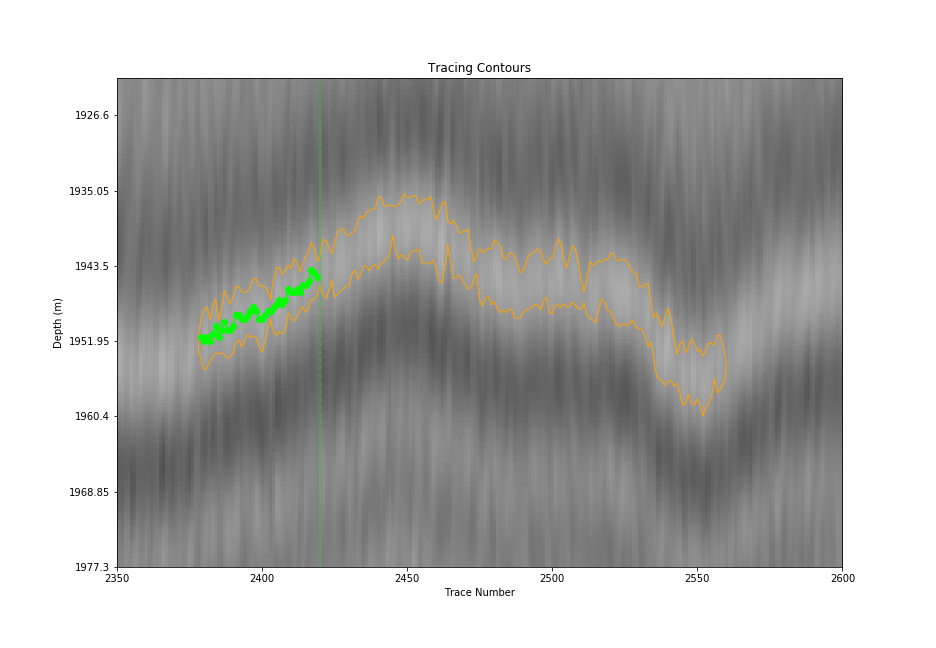

In [3]:
#make plotting interactive
%matplotlib notebook

#call animation here
trace_contours(dat, long_contours_pos, z, ridge_points_list, uniquex_list, min_, max_, xlims, ylims, ytick_list_contours, ytick_labels_contours)

<img src="./images/ridgeline.gif" width="750" align="center">

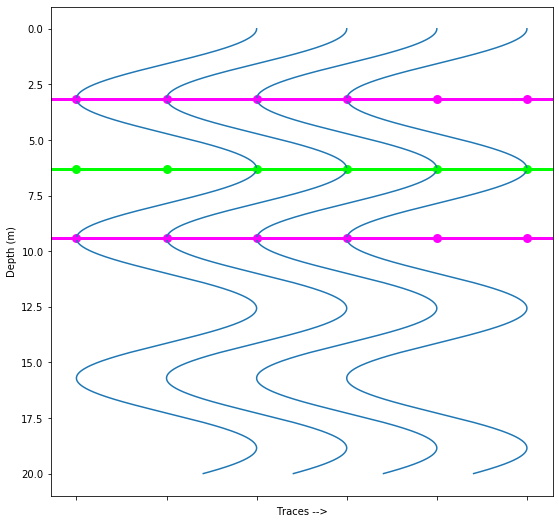

In [4]:
#test plotting the finished wave packet
plotting_examples()